<a href="https://colab.research.google.com/github/podobongbong/the_project/blob/main/nov18_multi_var_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/podobongbong/the_project.git
import os
os.chdir('/content/the_project')
import pandas as pd


fatal: destination path 'the_project' already exists and is not an empty directory.


In [2]:
seoul = pd.read_csv('/content/the_project/data/seoul_04.csv')
busan = pd.read_csv('/content/the_project/data/busan_04.csv')

seoul = pd.read_csv('/content/the_project/data/seoul_04_0.csv')
busan = pd.read_csv('/content/the_project/data/busan_04_0.csv')


Seoul Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ym               240 non-null    object 
 1   average          240 non-null    float64
 2   low              240 non-null    float64
 3   high             240 non-null    float64
 4   temp_range       240 non-null    float64
 5   high_deviation   240 non-null    float64
 6   low_deviation    240 non-null    float64
 7   climate_summary  240 non-null    float64
 8   energy           240 non-null    int64  
 9   pop              240 non-null    float64
 10  urban_bcr        240 non-null    float64
 11  urban_far        240 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 22.6+ KB
None
          average         low        high  temp_range  high_deviation  \
count  240.000000  240.000000  240.000000  240.000000      240.000000   
mean    13.020417    9.1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


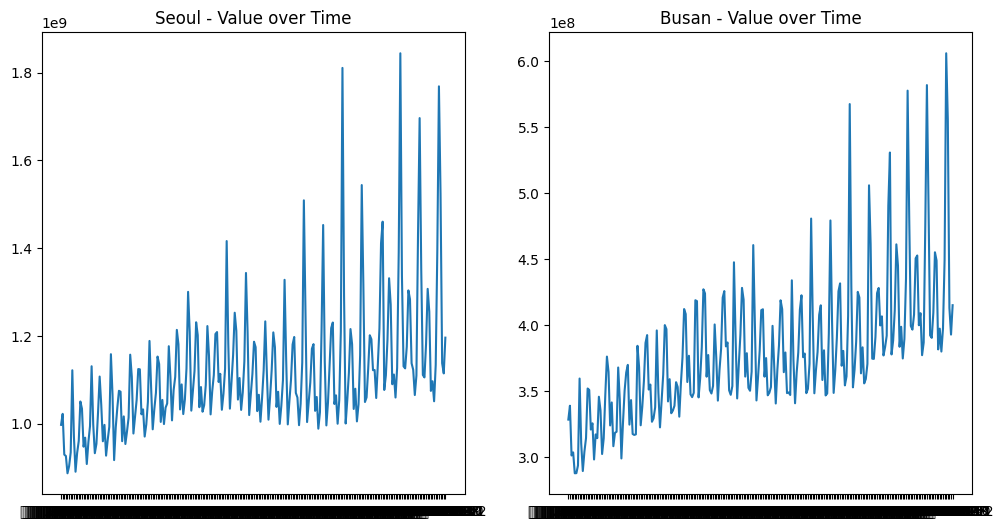


Missing Values (Seoul):
 ym                 0
average            0
low                0
high               0
temp_range         0
high_deviation     0
low_deviation      0
climate_summary    0
energy             0
pop                0
urban_bcr          0
urban_far          0
dtype: int64

Missing Values (Busan):
 ym                 0
average            0
low                0
high               0
temp_range         0
high_deviation     0
low_deviation      0
climate_summary    0
energy             0
pop                0
urban_bcr          0
urban_far          0
dtype: int64


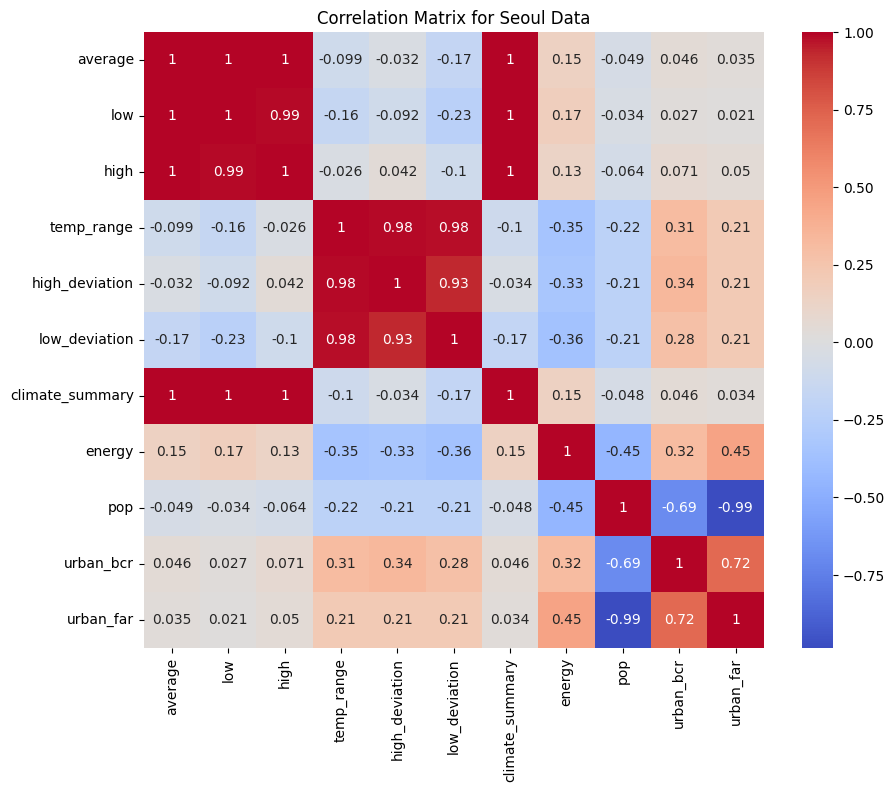

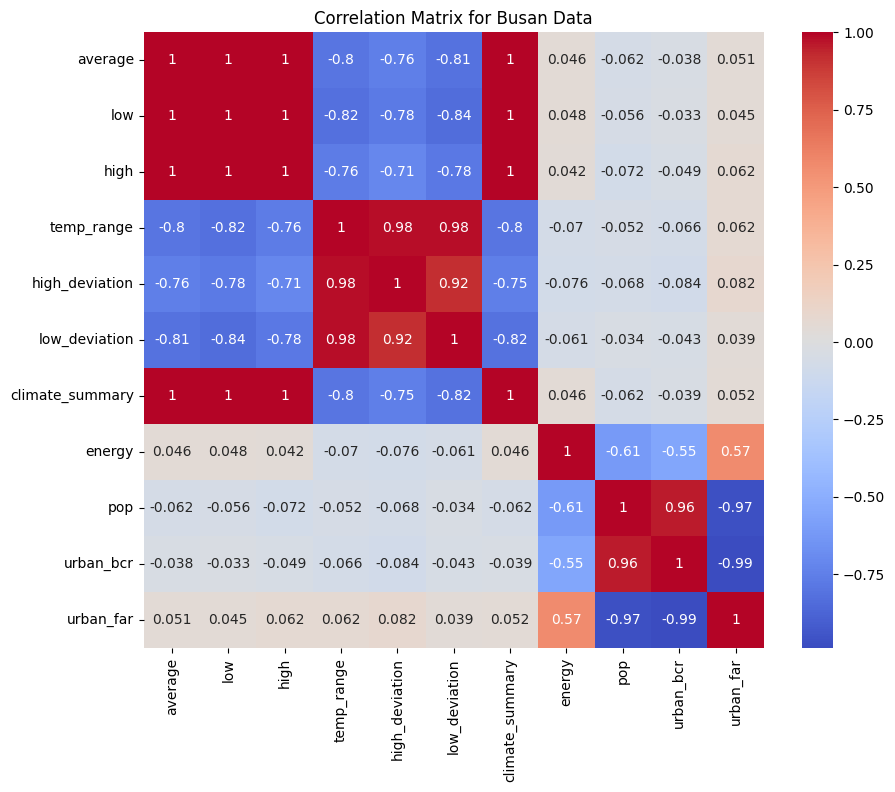

In [3]:
#Exploratory Data Analysis

# prompt: EDA seoul and busan dataset

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Basic EDA
print("Seoul Data:")
print(seoul.info())
print(seoul.describe())
print("\nBusan Data:")
print(busan.info())
print(busan.describe())

# Visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Seoul - Value over Time')
plt.plot(seoul['ym'], seoul['energy'])  # Replace 'value' with your target column
plt.subplot(1, 2, 2)
plt.title('Busan - Value over Time')
plt.plot(busan['ym'], busan['energy']) # Replace 'value' with your target column
plt.show()


# Check for missing values
print("\nMissing Values (Seoul):\n", seoul.isnull().sum())
print("\nMissing Values (Busan):\n", busan.isnull().sum())

# Correlation matrix
var = [col for col in seoul.columns if col != 'ym']
correlation = seoul[var].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Seoul Data')
plt.show()

correlation = busan[var].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Busan Data')
plt.show()



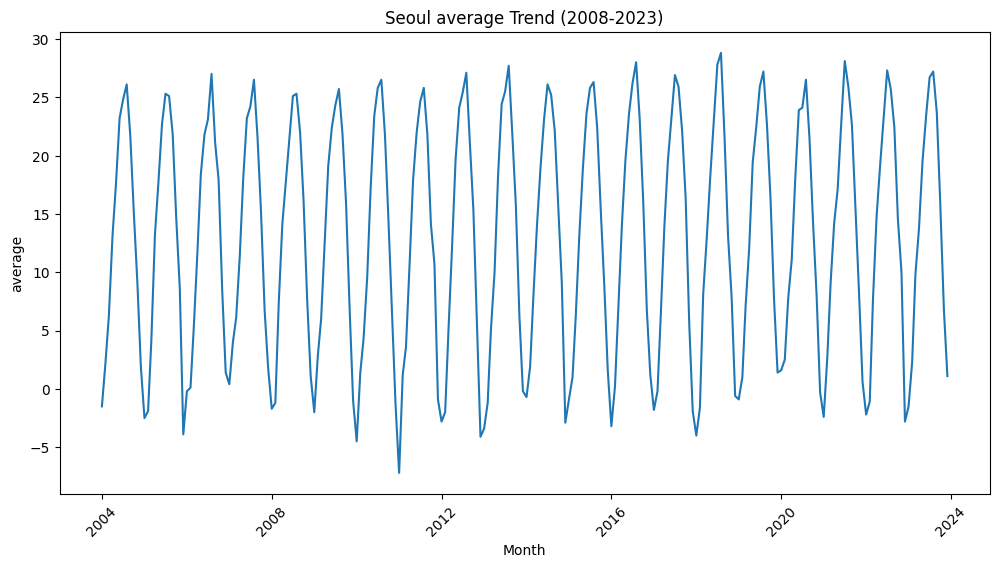

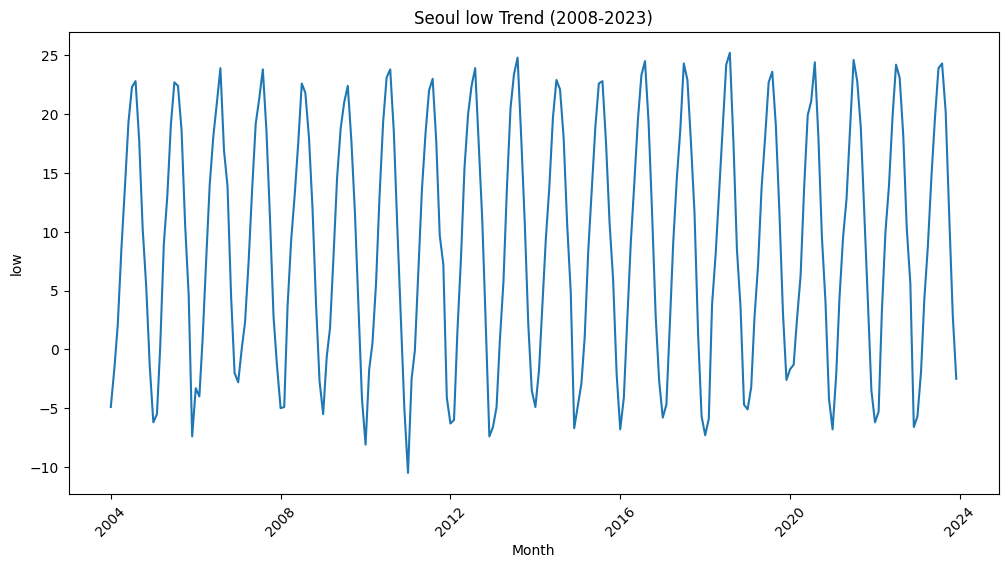

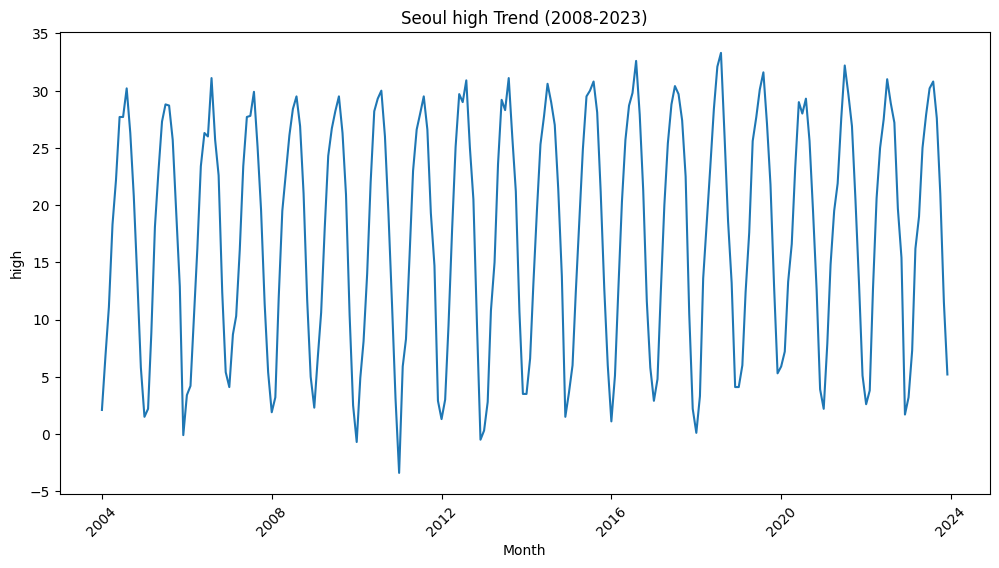

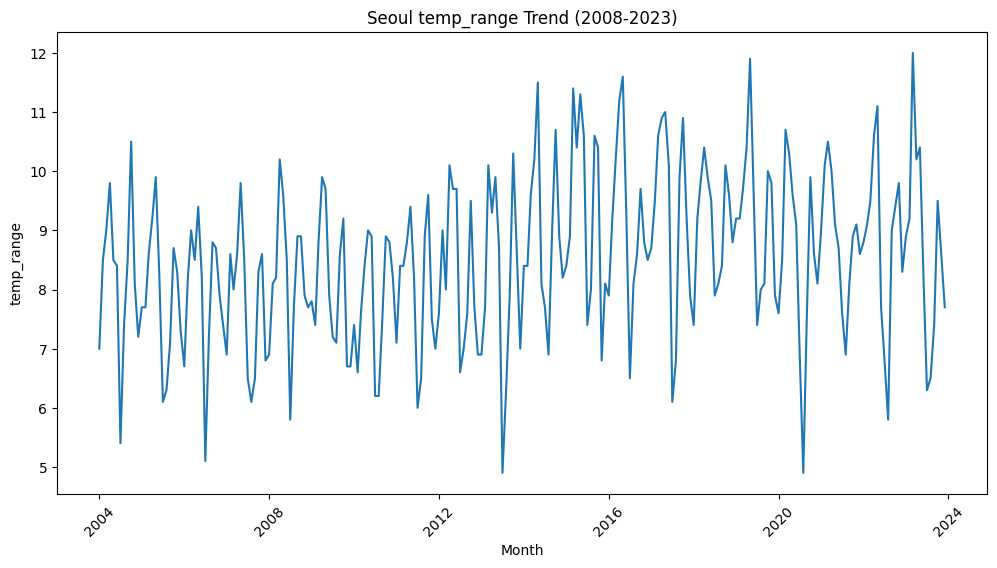

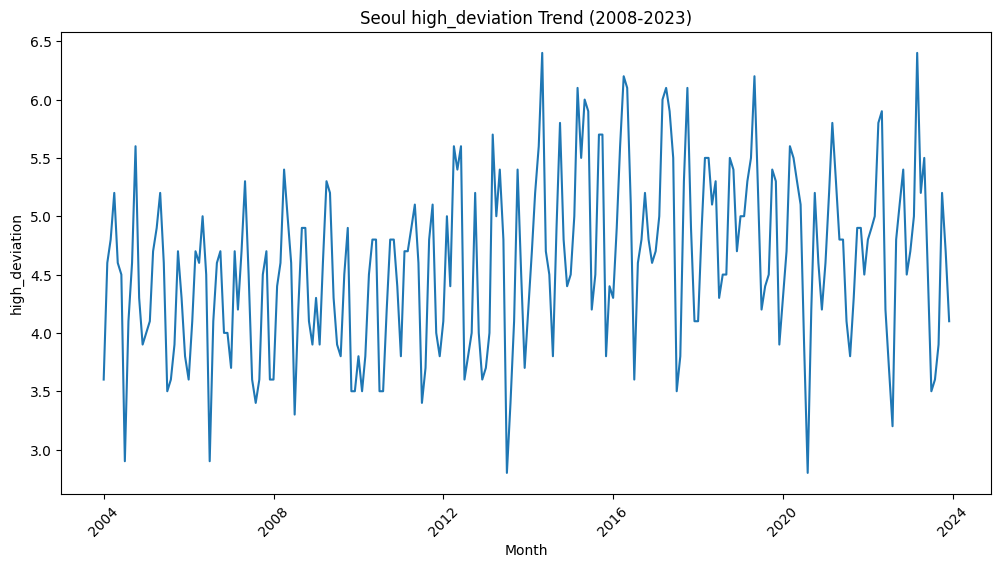

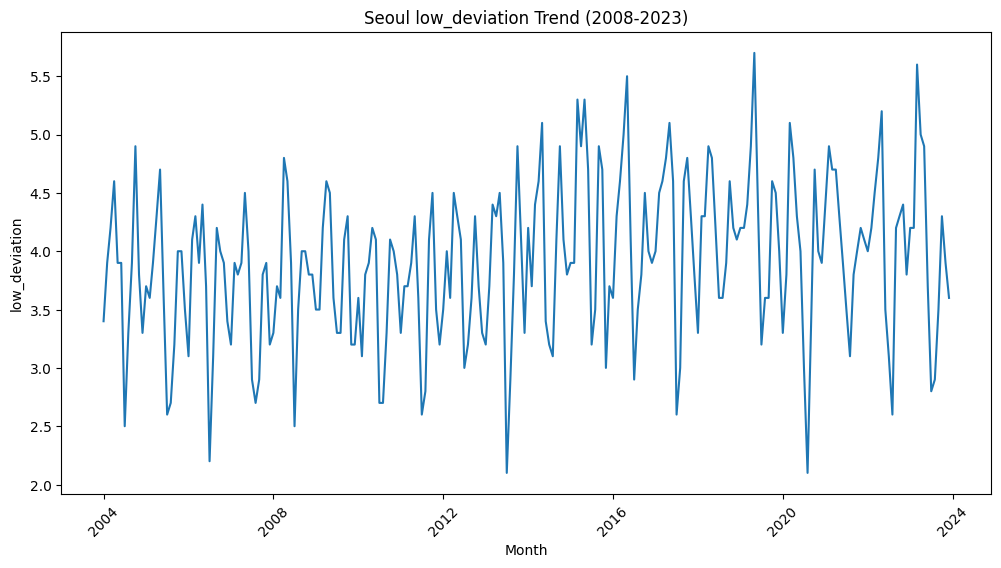

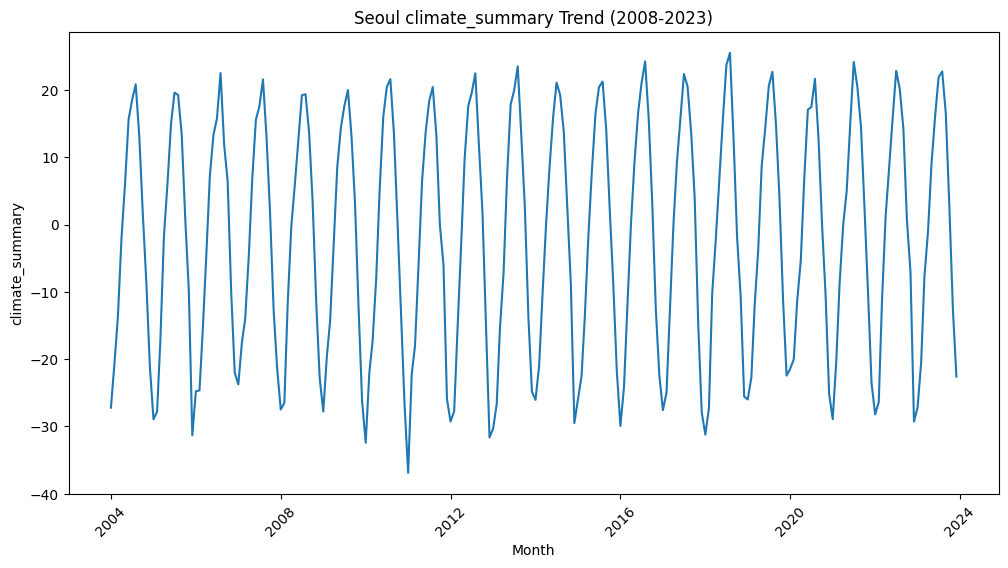

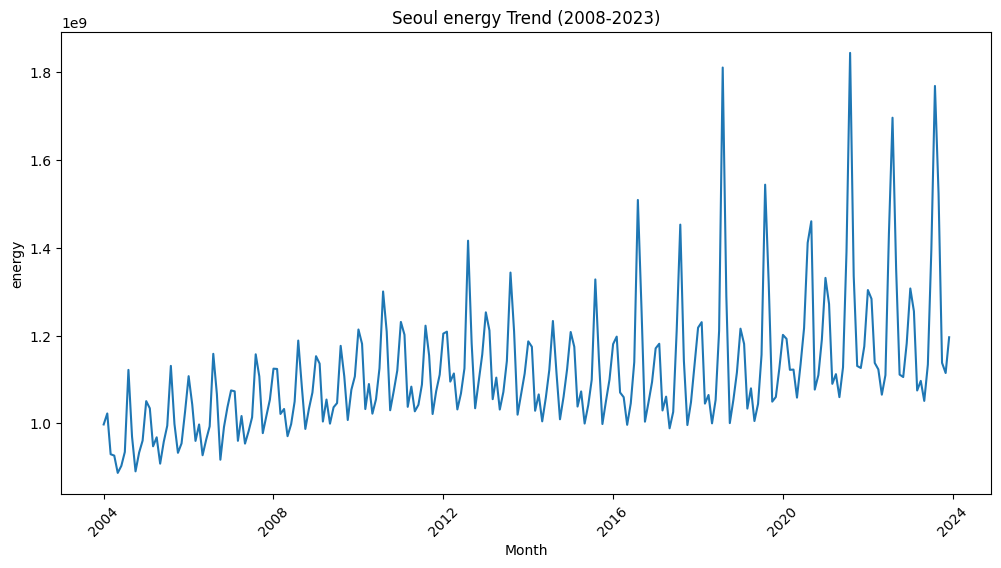

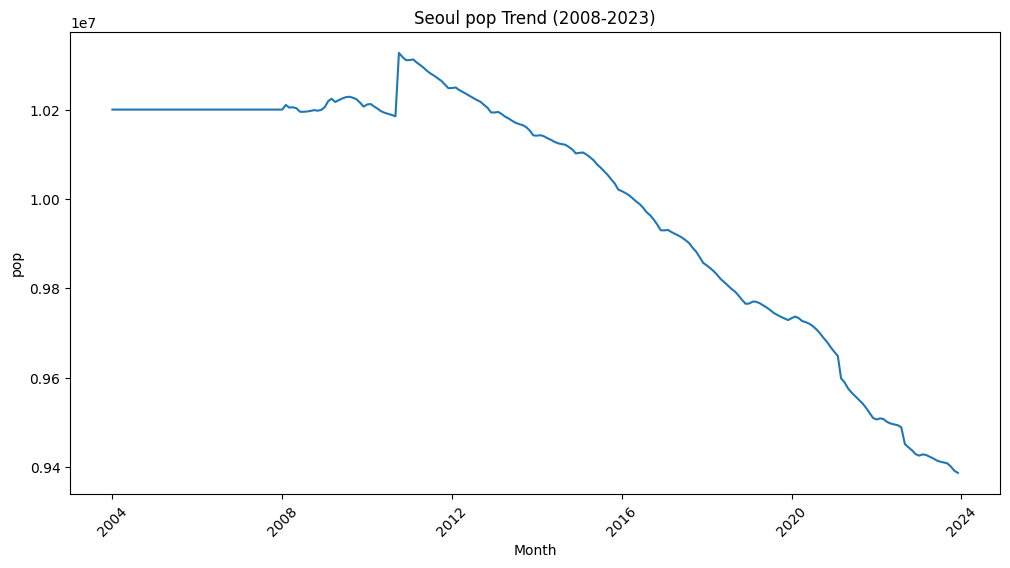

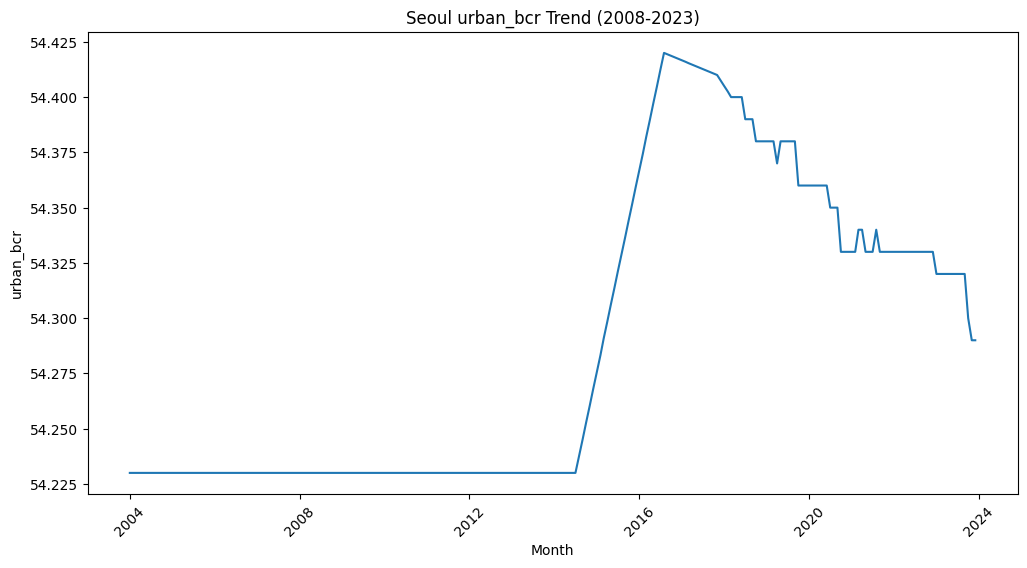

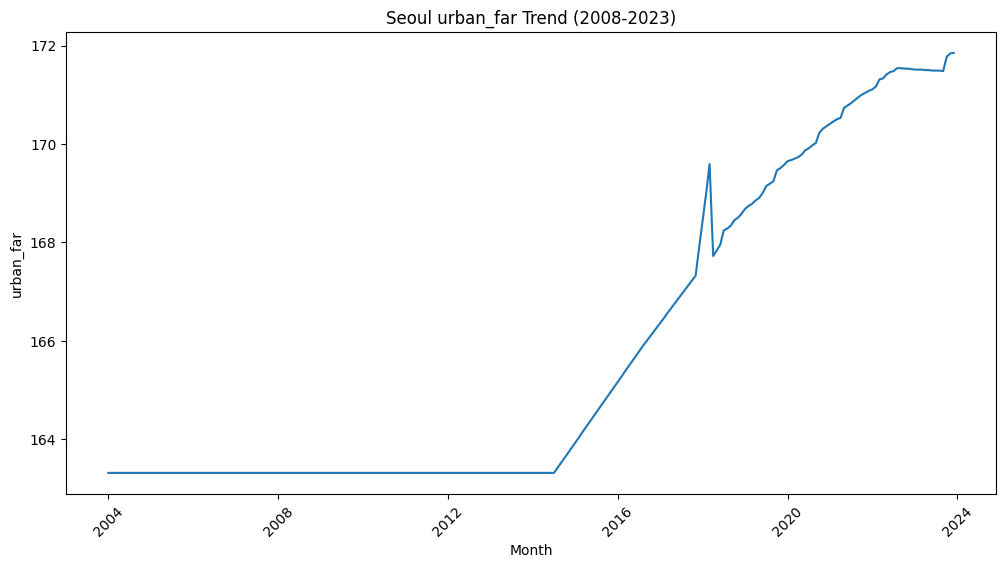

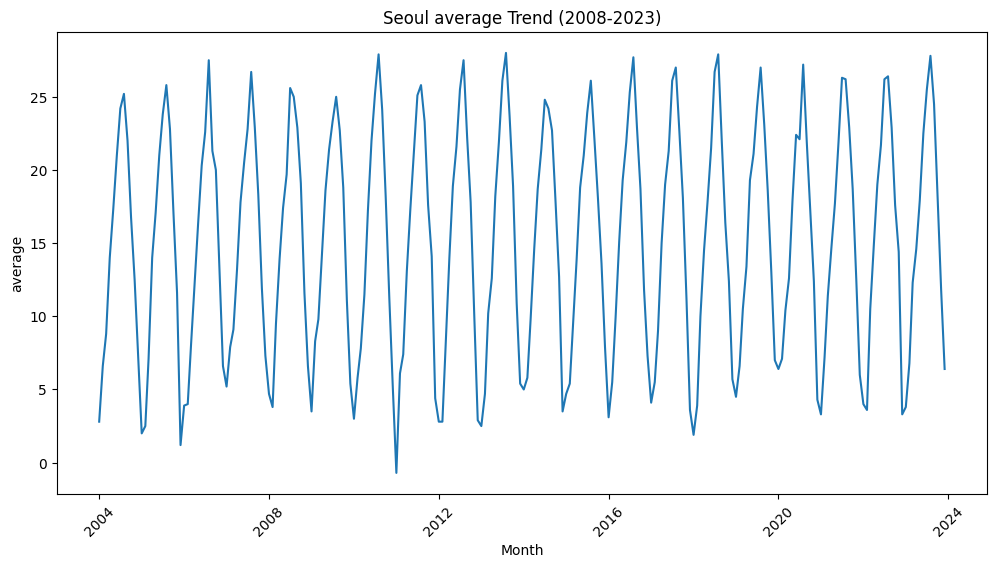

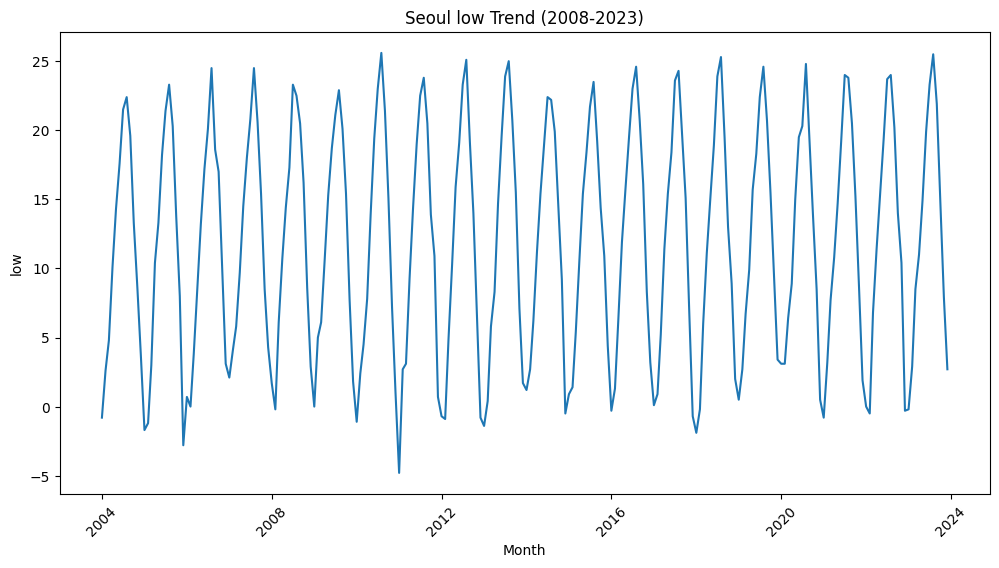

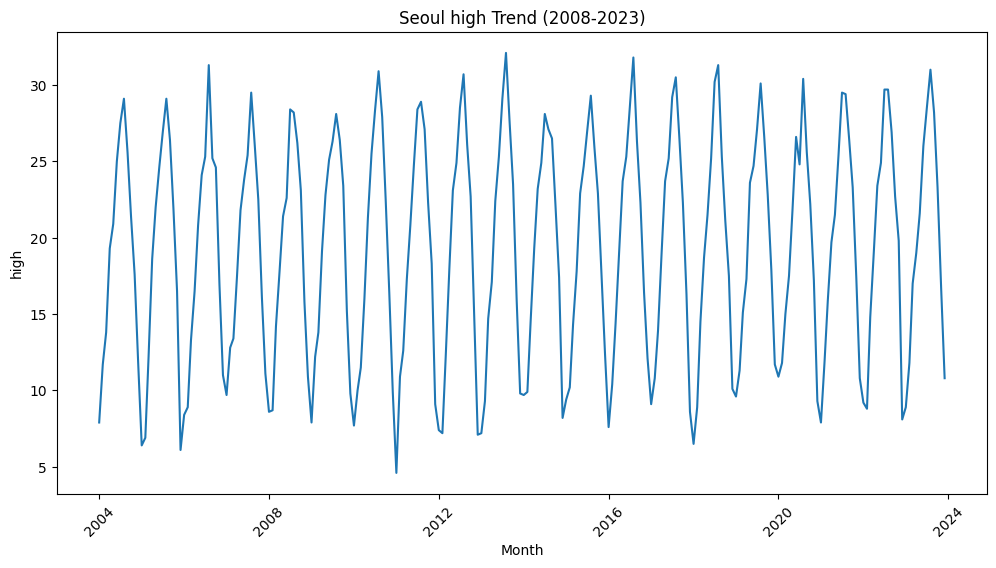

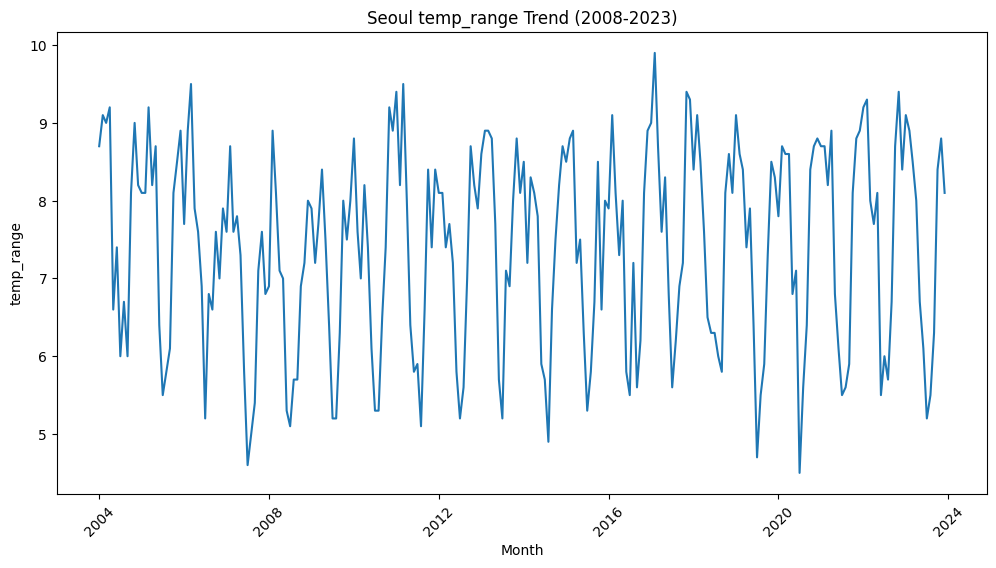

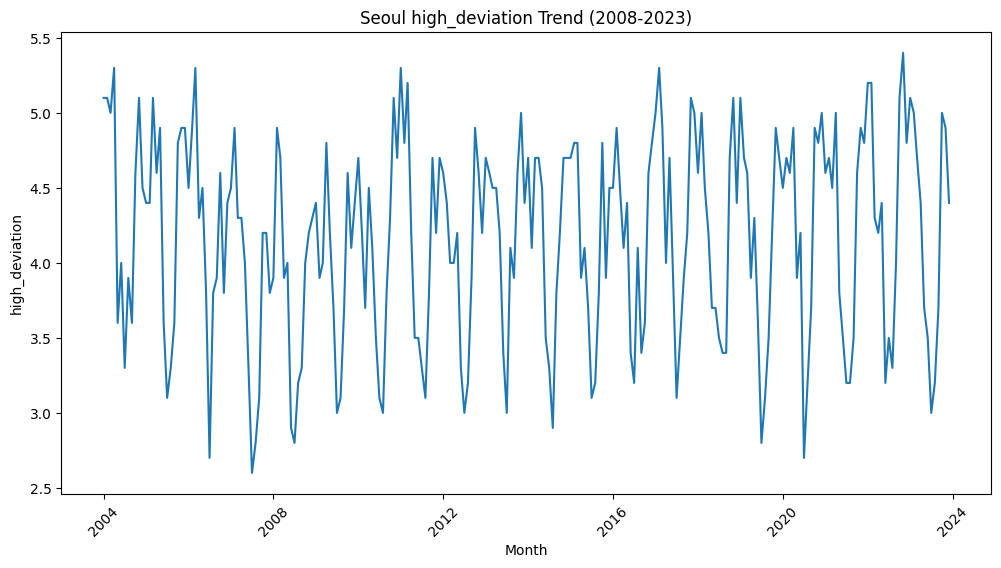

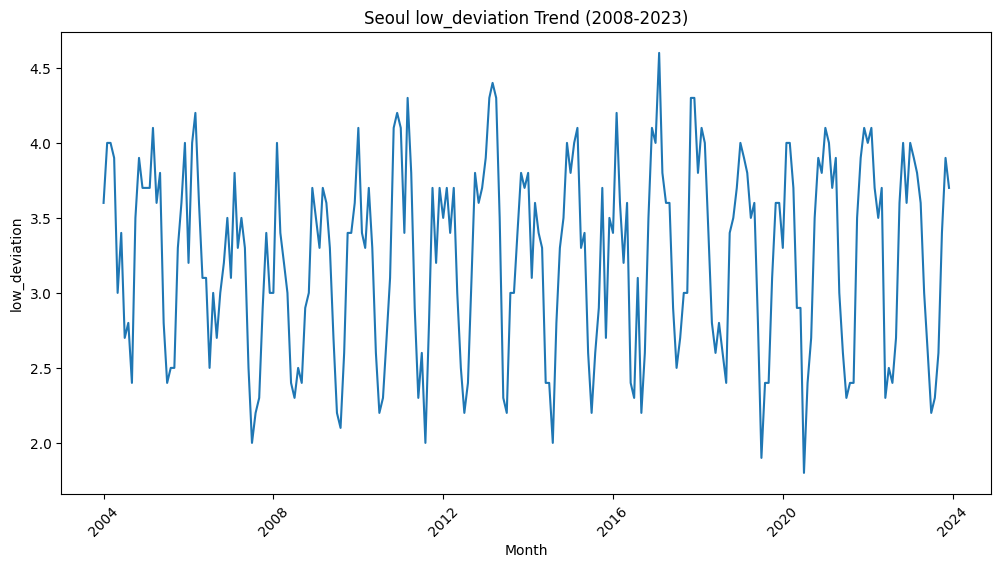

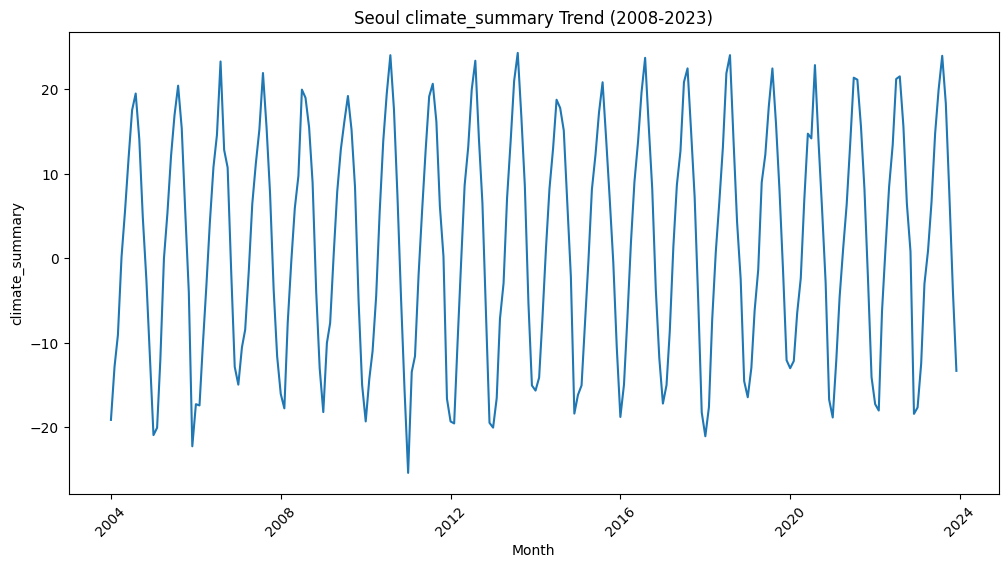

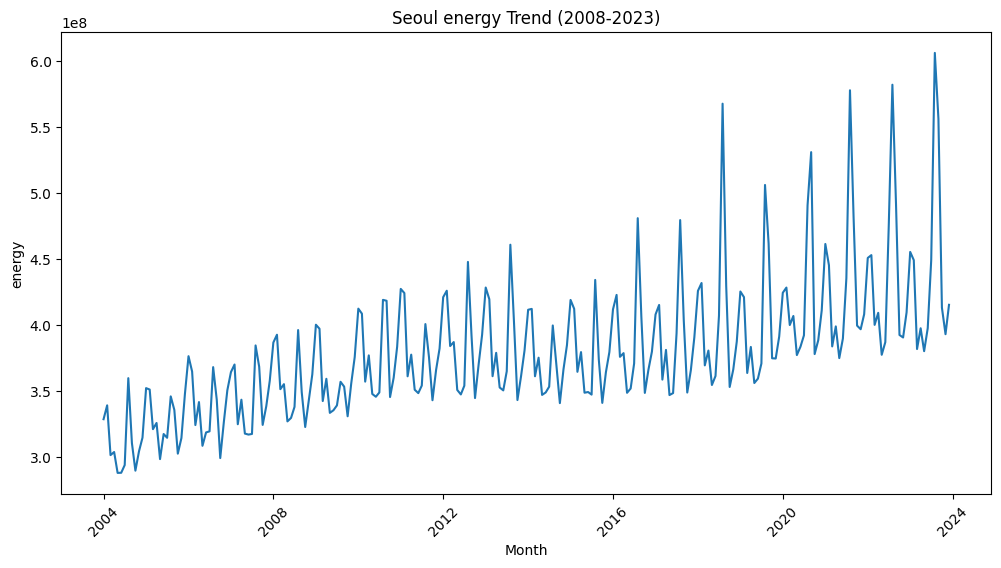

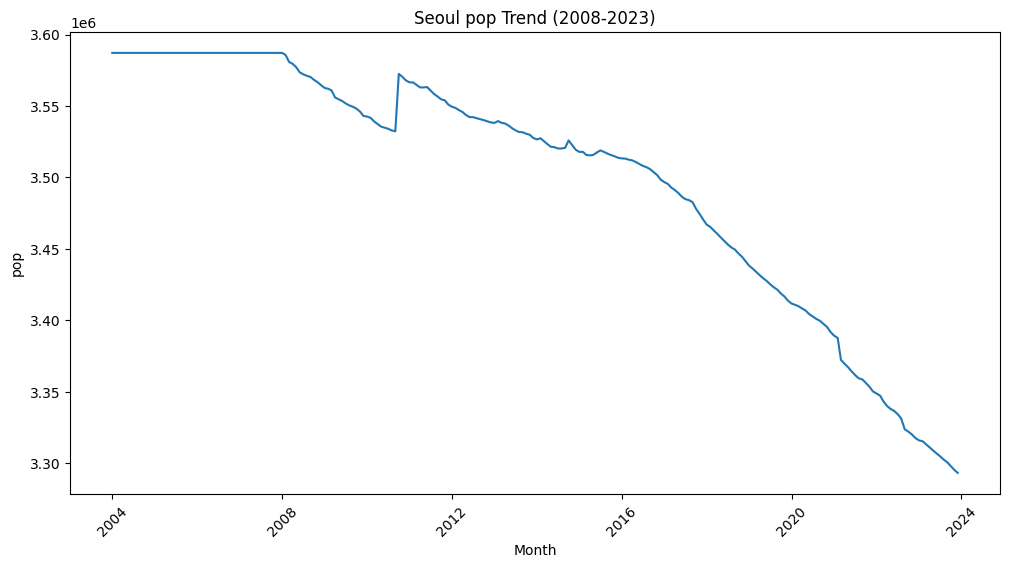

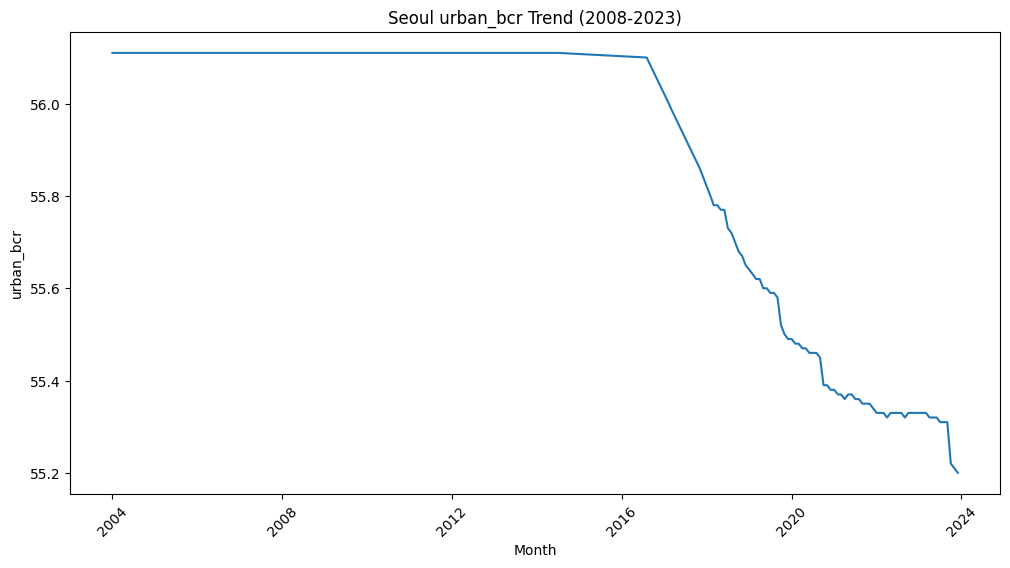

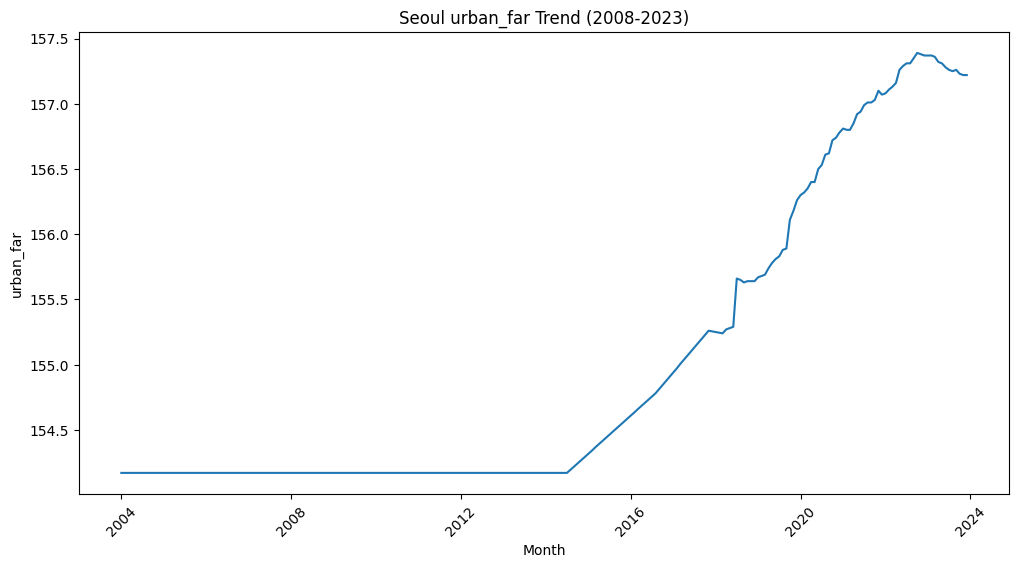

In [15]:
for column in seoul.columns:
  if column not in ['ym', 'month']:  # Exclude 'ym' and 'month' columns
    plt.figure(figsize=(12, 6))
    plt.plot(seoul['ym'], seoul[column])
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Seoul {column} Trend (2008-2023)')
    plt.xticks(rotation=45)
    plt.show()

for column in busan.columns:
  if column not in ['ym', 'month']:  # Exclude 'ym' and 'month' columns
    plt.figure(figsize=(12, 6))
    plt.plot(busan['ym'], busan[column])
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Seoul {column} Trend (2008-2023)')
    plt.xticks(rotation=45)
    plt.show()


In [16]:
seoul['ym'] = pd.to_datetime(seoul['ym'])
busan['ym'] = pd.to_datetime(busan['ym'])
"""
# Filter dataframes to start from 2008
seoul = seoul[seoul['ym'].dt.year >= 2008]
busan = busan[busan['ym'].dt.year >= 2008]
"""

# Filter dataframes to start from 2014
seoul = seoul[seoul['ym'].dt.year >= 2014]
busan = busan[busan['ym'].dt.year >= 2014]

import numpy as np
seoul['sin'] = np.sin(2*np.pi*seoul['ym'].dt.month/12)
seoul['cos'] = np.cos(2*np.pi*seoul['ym'].dt.month/12)

busan['sin'] = np.sin(2*np.pi*busan['ym'].dt.month/12)
busan['cos'] = np.cos(2*np.pi*busan['ym'].dt.month/12)



<ipython-input-16-763c831c607f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['sin'] = np.sin(2*np.pi*seoul['ym'].dt.month/12)
<ipython-input-16-763c831c607f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['cos'] = np.cos(2*np.pi*seoul['ym'].dt.month/12)
<ipython-input-16-763c831c607f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [17]:

import tensorflow as tf
import numpy as np
import random
# seed fixing
seed = random.randint(0, 100000) # generate a random seed
print(f"Seed used for this run: {seed}")
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#%% DATA PREP
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seoul Scalers
scaler_energy_seoul = MinMaxScaler()
scaler_population_seoul = MinMaxScaler()
scaler_climate_seoul = MinMaxScaler()
scaler_urban_bcr_seoul = MinMaxScaler()
scaler_urban_far_seoul = MinMaxScaler()

# Busan Scalesrs
scaler_energy_busan = MinMaxScaler()
scaler_population_busan = MinMaxScaler()
scaler_climate_busan = MinMaxScaler()
scaler_urban_bcr_busan = MinMaxScaler()
scaler_urban_far_busan = MinMaxScaler()

# Normalize Seoul data (energy, pop, climate, urban 2)
seoul_energy_scaled = scaler_energy_seoul.fit_transform(seoul['energy'].values.flatten().reshape(-1, 1))
seoul_population_scaled = scaler_population_seoul.fit_transform(seoul['pop'].values.flatten().reshape(-1, 1))

seoul_climate_scaled = scaler_climate_seoul.fit_transform(seoul['climate_summary'].values.flatten().reshape(-1, 1))

seoul_urban_bcr_scaled = scaler_urban_bcr_seoul.fit_transform(seoul['urban_bcr'].values.flatten().reshape(-1, 1))
seoul_urban_far_scaled = scaler_urban_far_seoul.fit_transform(seoul['urban_far'].values.flatten().reshape(-1, 1))

# Normalize Busan data (energy, pop, climate, urban 2)
busan_energy_scaled = scaler_energy_busan.fit_transform(busan['energy'].values.flatten().reshape(-1, 1))
busan_population_scaled = scaler_population_busan.fit_transform(busan['pop'].values.flatten().reshape(-1, 1))

busan_climate_scaled = scaler_climate_busan.fit_transform(busan['climate_summary'].values.flatten().reshape(-1, 1))

busan_urban_bcr_scaled = scaler_urban_bcr_busan.fit_transform(busan['urban_bcr'].values.flatten().reshape(-1, 1))
busan_urban_far_scaled = scaler_urban_far_busan.fit_transform(busan['urban_far'].values.flatten().reshape(-1, 1))

# sin,cos
#sin = seoul['sin'].values.flatten().reshape(-1,1)
#cos = seoul['cos'].values.flatten().reshape(-1,1)

Seed used for this run: 52532


In [18]:
#%% SLIDING WINDOW
#%% Create Sliding Windows
def create_sliding_window_multi(data_energy, data_population, data_climate, urban_bcr, urban_far, window_size):
                                #,sin, cos, window_size):
    X, y = [], []
    for i in range(window_size, len(data_energy)):
        X.append(np.column_stack((data_energy[i-window_size:i], data_population[i-window_size:i],data_climate[i-window_size:i],
                                  urban_bcr[i-window_size:i],urban_far[i-window_size:i])))
#                                  , sin[i-window_size:i],cos[i-window_size:i])))
        y.append(data_energy[i])  # Next month's energy consumption
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
feature_number = 5 #energy, population, climate, urban_bcr, urban_far
#feature_number = 7 #energy, population, climate, urban_bcr, urban_far, sin, cos

# Create sliding window samples for Seoul and Busan
X_seoul, y_seoul = create_sliding_window_multi(seoul_energy_scaled, seoul_population_scaled, seoul_climate_scaled,
                                               seoul_urban_bcr_scaled, seoul_urban_far_scaled, WINDOW_SIZE)
#                                               ,sin,cos, WINDOW_SIZE)
X_busan, y_busan = create_sliding_window_multi(busan_energy_scaled, busan_population_scaled, busan_climate_scaled,
                                               busan_urban_bcr_scaled, busan_urban_far_scaled, WINDOW_SIZE)
#                                               ,sin,cos, WINDOW_SIZE)

# Split Busan data into training and test sets (hold out the last 12 months for testing)
X_train_busan = X_busan[:-12]
y_train_busan = y_busan[:-12]
X_test_busan = X_busan[-12:]
y_test_busan = y_busan[-12:]


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, BatchNormalization, Reshape
import matplotlib.pyplot as plt

# Base model: LSTM
## Step 1: Pre-trained Model for Feature Extraction on Seoul's Data
# Building and compiling the pre-trained model
input_layer = Input(shape=(WINDOW_SIZE, feature_number), name='Input')
lstm_out = LSTM(64, activation='tanh', name='LSTM_Layer')(input_layer)
dense_1 = Dense(32, activation='relu', name='Dense_1')(lstm_out)
dense_2 = Dense(16, activation='relu', name='Dense_2')(dense_1)
output_layer = Dense(1, activation='linear', name='Output')(dense_2)

pretrained_model = Model(inputs=input_layer, outputs=output_layer)
pretrained_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Pretrain on Seoul's data
print("Pretraining on Seoul's data...")
history_pretrain = pretrained_model.fit(X_seoul, y_seoul, epochs=100, batch_size=16, validation_split=0.2)

# Check weights before freezing
print("Weights before freezing:")
print(pretrained_model.weights)

pretrained_model.summary()


Pretraining on Seoul's data...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0332 - mae: 0.1266 - val_loss: 0.0543 - val_mae: 0.1774
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0331 - mae: 0.1456 - val_loss: 0.0553 - val_mae: 0.1684
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0272 - mae: 0.1158 - val_loss: 0.0518 - val_mae: 0.1783
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0256 - mae: 0.1207 - val_loss: 0.0518 - val_mae: 0.1898
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0279 - mae: 0.1268 - val_loss: 0.0506 - val_mae: 0.1831
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0258 - mae: 0.1179 - val_loss: 0.0499 - val_mae: 0.1833
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0255 - mae: 0.1210 - val_loss: 0.0500 - val_mae: 0.1868
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0264 - mae: 0.1241 - val_loss: 0.0493 - val_mae: 0.1853
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1

KeyboardInterrupt: 

In [20]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Hyperparameter grid for tuning
param_grid = {
    'lstm_units': [32, 64, 128], #LSTM의 셀 수. 학습할수 있는 feature의 차원을 결정. 많으면 복잡 시퀀스 학습 가능/비용부담+과적합 위험
    'dense1_units': [16, 32, 64], #Dense1의 뉴런 수. LSTM이 추출한 시퀀스를 압축, 변환. 많으면 복잡 비선형 관계 학습 가능/
    'dense2_units': [8, 16, 32], #Dense2의 뉴런 수. Dense1을 추가 압축, 변환.
    'learning_rate': [0.001, 0.0005, 0.0001], #가중치를 업데이트 하는 속도. 컴퓨팅 효율화
    'batch_size': [16, 32] # 한번에 모델에 입력되는 샘플 사이즈. 작을수록 세밀/비용부담, 컴퓨팅 효율화
}

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Initialize trackers for the best model
best_model = None
best_val_loss = float('inf')
best_params = None

# Perform grid search over parameter combinations
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")

    # Build model with current parameters
    input_layer = Input(shape=(WINDOW_SIZE, feature_number), name='Input')
    lstm_out = LSTM(params['lstm_units'], activation='tanh', name='LSTM_Layer')(input_layer)
    dense_1 = Dense(params['dense1_units'], activation='relu', name='Dense_1')(lstm_out)
    dense_2 = Dense(params['dense2_units'], activation='relu', name='Dense_2')(dense_1)
    output_layer = Dense(1, activation='linear', name='Output')(dense_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(
        X_seoul, y_seoul,
        epochs=100,
        batch_size=params['batch_size'],
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model on validation data
    val_loss = min(history.history['val_loss'])
    print(f"Validation Loss: {val_loss}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model
        best_params = params

# Display the best parameters and validation loss
print("Best Hyperparameters:", best_params)
print("Best Validation Loss:", best_val_loss)

# Save the best model for future use
best_model.save('best_pretrained_model.h5')
print("Best model saved as 'best_pretrained_model.h5'.")

# Load the best model if needed
# from tensorflow.keras.models import load_model
# best_model = load_model('best_pretrained_model.h5')


Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.001, 'lstm_units': 32}
Validation Loss: 0.015263640321791172
Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.001, 'lstm_units': 64}
Validation Loss: 0.05283621326088905
Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.001, 'lstm_units': 128}
Validation Loss: 0.049701835960149765
Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.0005, 'lstm_units': 32}
Validation Loss: 0.06960301846265793
Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.0005, 'lstm_units': 64}
Validation Loss: 0.06655251234769821
Testing parameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.0005, 'lstm_units': 128}
Validation Loss: 0.05088527500629425
Testing parameters: {'batch_size': 16, 'dense1_unit

Validation Loss: 0.11786814033985138
Best Hyperparameters: {'batch_size': 16, 'dense1_units': 16, 'dense2_units': 8, 'learning_rate': 0.001, 'lstm_units': 32}
Best Validation Loss: 0.015263640321791172
Best model saved as 'best_pretrained_model.h5'.


In [21]:
pretrained_model = best_model
## Step 3: Freeze the LSTM layer for Feature Extraction
#전략: 데이터셋 작으면 최대한 많이 freezing, 데이터셋 크고 원래 도메인과 다르다면 많이 조정.

#Option 1: only freezing LSTM Layer: LSTM레이어는 시간적 패턴 학습 특화. 시간에 따른 에너지 소비의 일반적 패턴을 서울에서 학습, 부산 데이터에 활용.
# Freeze the LSTM layer in the pre-trained model for feature extraction
pretrained_model.get_layer('LSTM_Layer').trainable = False

# Confirm frozen layers
print("Layers after freezing:")
for layer in pretrained_model.layers:
    print(layer.name, layer.trainable)

# Create a model for feature extraction from the LSTM layer's output
feature_extractor = Model(inputs=pretrained_model.input, outputs=pretrained_model.get_layer('LSTM_Layer').output)

# Generate extracted features for Busan's training and test data
X_train_features_busan = feature_extractor.predict(X_train_busan)
X_test_features_busan = feature_extractor.predict(X_test_busan)


Layers after freezing:
Input True
LSTM_Layer False
Dense_1 True
Dense_2 True
Output True
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [22]:

## Step 4: Build a New Model for Fine-Tuning on Busan's Data
# New model input layer
input_features_layer = Input(shape=(X_train_features_busan.shape[1],), name='Input_Features')
reshaped_input = Reshape((1, X_train_features_busan.shape[1]))(input_features_layer)  # Reshape to (batch_size, time_steps=1, features)

# New LSTM layer for fine-tuning
lstm_new = LSTM(32, activation='tanh', name='LSTM_New')(reshaped_input)

# Add dense layers with batch normalization for better training
dense_new_1 = Dense(32, activation='relu', name='Dense_New_1')(lstm_new)
batch_norm_1 = BatchNormalization(name='Batch_Norm_1')(dense_new_1)
dense_new_2 = Dense(16, activation='relu', name='Dense_New_2')(batch_norm_1)
batch_norm_2 = BatchNormalization(name='Batch_Norm_2')(dense_new_2)

# Final output layer
output_new_layer = Dense(1, activation='linear', name='Output')(batch_norm_2)

# Combine into new model
new_model = Model(inputs=input_features_layer, outputs=output_new_layer)
new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Check initial weights of new model before fine-tuning
print("Initial weights of the new model:")
print(new_model.weights)



Initial weights of the new model:
[<KerasVariable shape=(32, 128), dtype=float32, path=LSTM_New/lstm_cell/kernel>, <KerasVariable shape=(32, 128), dtype=float32, path=LSTM_New/lstm_cell/recurrent_kernel>, <KerasVariable shape=(128,), dtype=float32, path=LSTM_New/lstm_cell/bias>, <KerasVariable shape=(32, 32), dtype=float32, path=Dense_New_1/kernel>, <KerasVariable shape=(32,), dtype=float32, path=Dense_New_1/bias>, <KerasVariable shape=(32,), dtype=float32, path=Batch_Norm_1/gamma>, <KerasVariable shape=(32,), dtype=float32, path=Batch_Norm_1/beta>, <KerasVariable shape=(32,), dtype=float32, path=Batch_Norm_1/moving_mean>, <KerasVariable shape=(32,), dtype=float32, path=Batch_Norm_1/moving_variance>, <KerasVariable shape=(32, 16), dtype=float32, path=Dense_New_2/kernel>, <KerasVariable shape=(16,), dtype=float32, path=Dense_New_2/bias>, <KerasVariable shape=(16,), dtype=float32, path=Batch_Norm_2/gamma>, <KerasVariable shape=(16,), dtype=float32, path=Batch_Norm_2/beta>, <KerasVariable

In [23]:

## Step 5: Train the new model with extracted features for Busan's data
print("Training new layers on Busan's data...")
history_finetune = new_model.fit(X_train_features_busan, y_train_busan, epochs=100, batch_size=32, validation_split=0.2)

# Check weights after fine-tuning
print("Weights after fine-tuning:")
print(new_model.weights)




Training new layers on Busan's data...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 2.0108 - mae: 1.1311 - val_loss: 0.1806 - val_mae: 0.3590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.6761 - mae: 1.0343 - val_loss: 0.1747 - val_mae: 0.3508
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4337 - mae: 0.9543 - val_loss: 0.1690 - val_mae: 0.3426
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.2248 - mae: 0.8795 - val_loss: 0.1634 - val_mae: 0.3344
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0691 - mae: 0.8185 - val_loss: 0.1579 - val_mae: 0.3262
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9582 - mae: 0.7723 - val_loss: 0.1526 - val_mae: 0.3179
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8823 - mae: 0.7373 - val_loss: 0.1473 - val_mae: 0.3096
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8254 - mae: 0.7101 - val_loss: 0.1422 - val_mae: 0.3013
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━

Evaluating on Busan's test data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.4966 - mae: 1.7568
Test Loss: 3.4966423511505127, Test MAE: 1.7568145990371704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


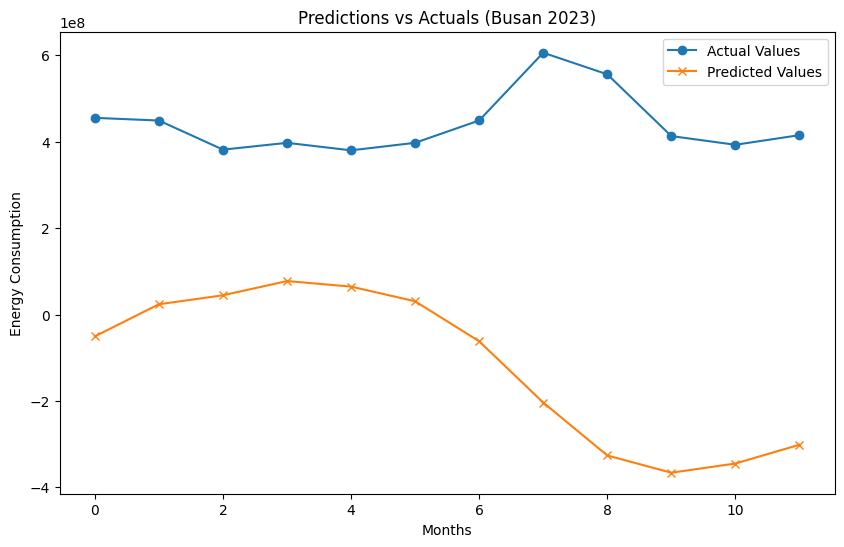

In [12]:

# Step 6: Evaluate and Predict on Busan's Test Data

print("Evaluating on Busan's test data...")
test_loss, test_mae = new_model.evaluate(X_test_features_busan, y_test_busan)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict on test data
predictions = new_model.predict(X_test_features_busan)

# Rescale predictions and actual values back to the original scale for interpretation
predictions_rescaled = scaler_energy_busan.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_rescaled = scaler_energy_busan.inverse_transform(y_test_busan.reshape(-1, 1)).flatten()

# Visualization of Prediction Results
def plot_predictions(y_true, y_pred, title='Predictions vs Actuals (Busan 2023)'):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(title)
    plt.xlabel('Months')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.show()

plot_predictions(actual_rescaled, predictions_rescaled)

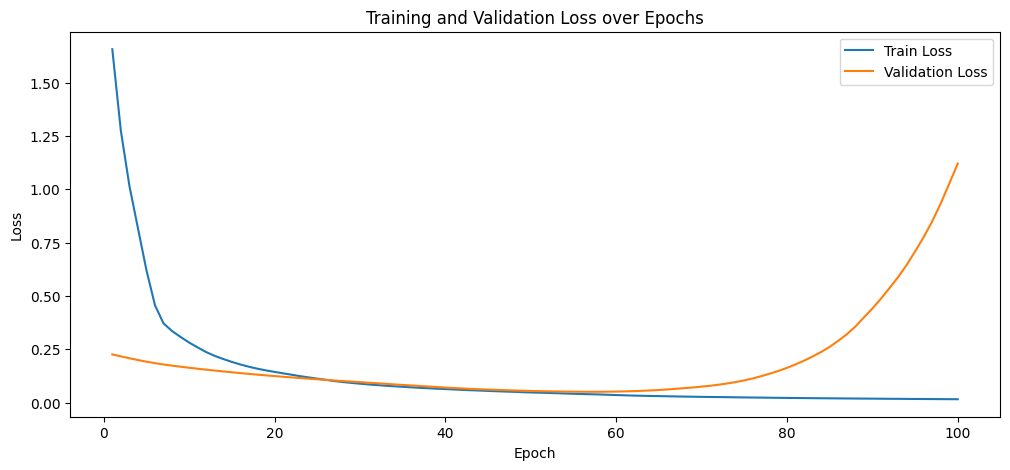

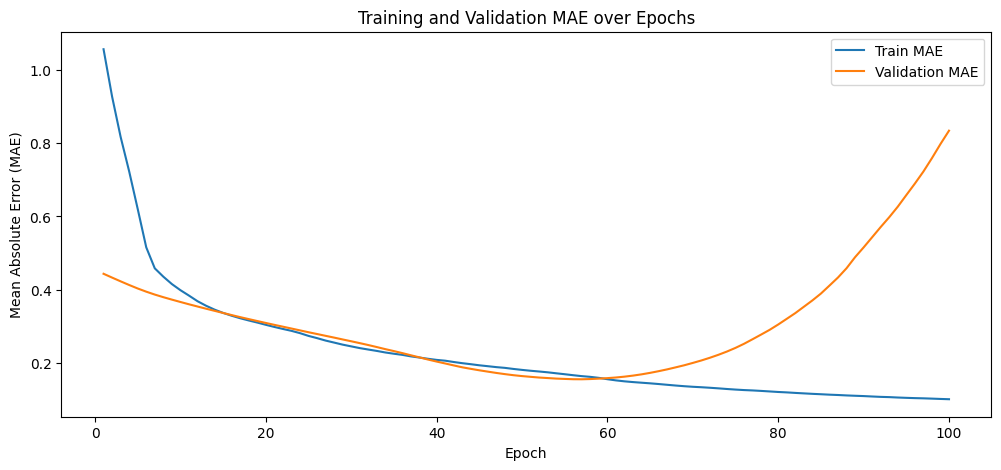

In [13]:

epochs = range(1, len(history_finetune.history['loss']) + 1)

# Loss
plt.figure(figsize=(12, 5))
plt.plot(epochs, history_finetune.history['loss'], label='Train Loss')
plt.plot(epochs, history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Training and Validation Loss over Epochs')
plt.show()

# MAE
plt.figure(figsize=(12, 5))
plt.plot(epochs, history_finetune.history['mae'], label='Train MAE')
plt.plot(epochs, history_finetune.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend(['Train MAE', 'Validation MAE'])
plt.title('Training and Validation MAE over Epochs')
plt.show()


In [14]:
save_path = "./transfer_LSTM_hybrid_model.h5"
new_model.save(save_path)
print("Model saved at:", save_path)


Model saved at: ./transfer_LSTM_hybrid_model.h5
